In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
newest_date = session.query(func.max(Measurement.date)).one()
newest_date[0]

'2017-08-23'

<function matplotlib.pyplot.show(close=None, block=None)>

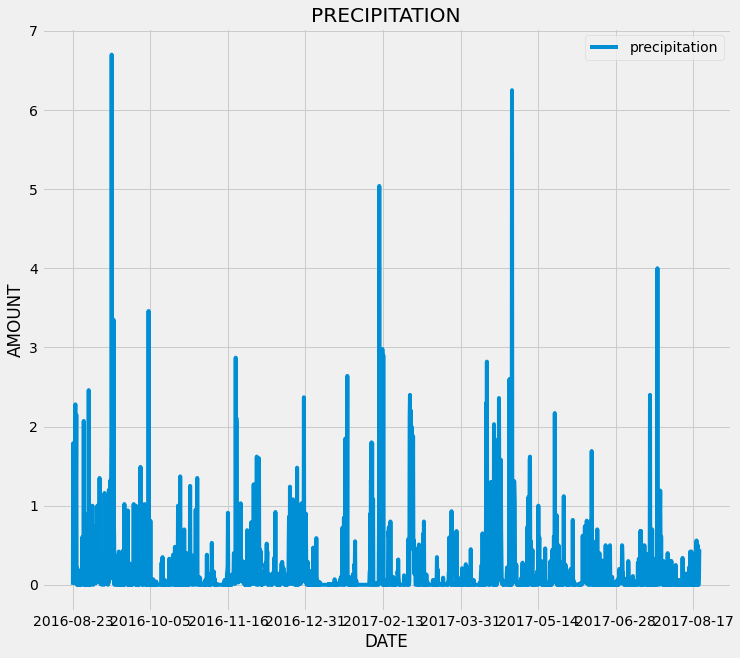

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = dt.datetime.strptime(newest_date[0], '%Y-%m-%d')
new_year = date.year
new_month = str(date.month).zfill(2)
new_day = str(date.day).zfill(2)

# Calculate the date one year from the last date in data set.

prev_year = new_year -1
prev_date = f"{prev_year}-{new_month}-{new_day}"

# Perform a query to retrieve the data and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=['date', 'precipitation'])
df = df.set_index('date')

# Sort the dataframe by date
df = df.sort_values("date")
df = df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(11,10), title="PRECIPITATION", xlabel="DATE", ylabel="AMOUNT")
plt.show


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_sta = (session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())

most_active_sta= active_sta[0][0]
active_sta

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temp_lha = (session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
 filter(Measurement.station == 'USC00519281').all())

temp_lha 

[(54.0, 85.0, 71.66378066378067)]

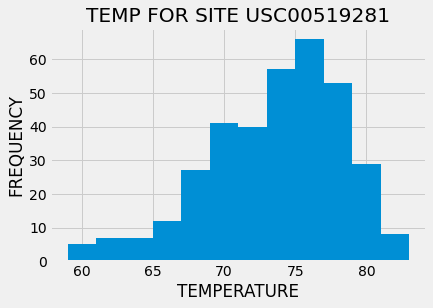

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_lha  = (session
       .query(Measurement.tobs)
        .filter(Measurement.date >= '2016-08-23')
       .filter(Measurement.station == most_active_sta)
        .all()
       )

temp_lhalist = [point[0] for point in temp_lha]
plt.figsize=(11,8)
plt.hist(temp_lhalist, bins=12)
plt.title(f"TEMP FOR SITE {most_active_sta }")
plt.xlabel("TEMPERATURE")
plt.ylabel("FREQUENCY")
plt.show()


# Close session

In [17]:
# Close Session
session.close()